In [41]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dhruvatara/ECS89G-DLProject/main/somewhat_cleaned.csv?token=AD6O32GXJXJBO5N6DVF3V427YHSWA')
twentycentury = df[df['Year']>1899]

HTTPError: ignored

In [42]:
# considering only 20th century+ data because GDP and inflation values are NaN before
twentycentury.isna().sum()

Unnamed: 0                                                   0
Country                                                      0
Year                                                         0
Gold Standard                                                0
exch_usd                                                     0
Domestic_Debt_In_Default                                     0
Sovereign External Debt                                      0
GDP_Weighted_default                                         0
Inflation, Annual percentages of average consumer prices     0
Independence                                                 0
Unemployment Rate                                            0
GDP                                                          0
GDP PerCapita                                               21
Crisis                                                       0
dtype: int64

In [43]:
# canada = twentycentury[twentycentury['Country']=='Canada']

In [44]:
country = twentycentury['Country'].tolist()
print(country)

['Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',

In [45]:
X = twentycentury.drop(['Unnamed: 0','Crisis','GDP PerCapita','Year','Country'],axis=1)
y = twentycentury['Crisis']
columns = X.columns

In [46]:
X.head()

,Gold Standard,exch_usd,Domestic_Debt_In_Default,Sovereign External Debt,GDP_Weighted_default,"Inflation, Annual percentages of average consumer prices",Independence,Unemployment Rate,GDP
100,1,1.0004,0,0,0.0,3.5801205818905992,1,0.0,15886.780
101,1,1.0004,0,0,0.0,1.5778596961572964,1,0.0,17143.756
102,1,1.0004,0,0,0.0,3.7351810750825427,1,0.0,18819.724
103,1,1.0004,0,0,0.0,1.6421705210365118,1,0.0,19378.380
104,1,1.0004,0,0,0.0,1.0982815938568167,1,0.0,19657.708


In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [48]:
X = pd.DataFrame(X,columns=columns)
X.head()

,Gold Standard,exch_usd,Domestic_Debt_In_Default,Sovereign External Debt,GDP_Weighted_default,"Inflation, Annual percentages of average consumer prices",Independence,Unemployment Rate,GDP
0,1.0,0.041984,0.0,0.0,0.0,0.160503,0.0,0.0,0.001580
1,1.0,0.041984,0.0,0.0,0.0,0.147410,0.0,0.0,0.001713
2,1.0,0.041984,0.0,0.0,0.0,0.161517,0.0,0.0,0.001889
3,1.0,0.041984,0.0,0.0,0.0,0.147831,0.0,0.0,0.001948
4,1.0,0.041984,0.0,0.0,0.0,0.144274,0.0,0.0,0.001978


In [49]:
X["Countries"] = country

In [50]:
X

,Gold Standard,exch_usd,Domestic_Debt_In_Default,Sovereign External Debt,GDP_Weighted_default,"Inflation, Annual percentages of average consumer prices",Independence,Unemployment Rate,GDP,Countries
0,1.0,0.041984,0.0,0.0,0.0,0.160503,0.0,0.000000,0.001580,Canada
1,1.0,0.041984,0.0,0.0,0.0,0.147410,0.0,0.000000,0.001713,Canada
2,1.0,0.041984,0.0,0.0,0.0,0.161517,0.0,0.000000,0.001889,Canada
3,1.0,0.041984,0.0,0.0,0.0,0.147831,0.0,0.000000,0.001948,Canada
4,1.0,0.041984,0.0,0.0,0.0,0.144274,0.0,0.000000,0.001978,Canada
...,...,...,...,...,...,...,...,...,...,...
343,0.0,0.065196,0.0,0.0,0.0,0.157638,0.0,0.753436,0.001544,United States
344,0.0,0.068201,0.0,0.0,0.0,0.150680,0.0,0.678581,0.001613,United States
345,0.0,0.069481,0.0,0.0,0.0,0.146685,0.0,0.622041,0.001675,United States
346,0.0,0.065356,0.0,0.0,0.0,0.147620,0.0,0.519836,0.001753,United States


In [51]:
X_train = X.loc[X['Countries'] != 'Mexico']

In [52]:
X_test = X.loc[X['Countries'] == 'Mexico']

In [53]:
X_train = X_train.drop(['Countries'], axis=1)
X_train.shape

(232, 9)

In [54]:
X_test = X_test.drop(['Countries'], axis=1)
X_test.shape

(116, 9)

In [55]:
y_train = y[:232]
print(y_train.shape)

(232,)


In [56]:
y_test = y[-116:]
print(y_test.shape)

(116,)


In [57]:
# Buid RNN model
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [58]:
model = keras.Sequential()

model.add(layers.Embedding(input_dim=2, output_dim=128)) #input_dim to be decided...

# Add a LSTM layer with 32 internal units.
model.add(layers.LSTM(128,activation='tanh', recurrent_activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dense(8, activation='relu'))
# Add a Dense layer with 1 unit.
#model.add(layers.Dense(1,activation='sigmoid'))

history = model.compile(optimizer="Adam", loss="MSE", metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         256       
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 131,969
Trainable params: 131,969
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(X_train,y_train,
         epochs=300,
         batch_size=64,
         validation_split=0.1)

Epoch 1/300
4/4 [==============================] - 0s 77ms/step - loss: 0.2498 - accuracy: 0.7740 - val_loss: 0.2496 - val_accuracy: 0.6667
Epoch 2/300
4/4 [==============================] - 0s 20ms/step - loss: 0.2493 - accuracy: 0.7740 - val_loss: 0.2492 - val_accuracy: 0.6667
Epoch 3/300
4/4 [==============================] - 0s 20ms/step - loss: 0.2485 - accuracy: 0.7740 - val_loss: 0.2486 - val_accuracy: 0.6667
Epoch 4/300
4/4 [==============================] - 0s 19ms/step - loss: 0.2475 - accuracy: 0.7740 - val_loss: 0.2476 - val_accuracy: 0.6667
Epoch 5/300
4/4 [==============================] - 0s 21ms/step - loss: 0.2454 - accuracy: 0.7740 - val_loss: 0.2455 - val_accuracy: 0.6667
Epoch 6/300
4/4 [==============================] - 0s 20ms/step - loss: 0.2411 - accuracy: 0.7740 - val_loss: 0.2408 - val_accuracy: 0.6667
Epoch 7/300
4/4 [==============================] - 0s 19ms/step - loss: 0.2316 - accuracy: 0.7740 - val_loss: 0.2311 - val_accuracy: 0.6667
Epoch 8/300
4/4 [===

In [68]:
y_predict = (model.predict(X_test)>0.5).astype('int32')

In [69]:
y_predict = y_predict.reshape(1, 116)
y_predict = y_predict[0].tolist()

y_test = y_test.tolist()

AttributeError: ignored

In [70]:
for i in range(len(y_predict)):
    print("True crisis data: {} <=> Predicted crisis data: {}".format(y_test[i], y_predict[i]))

True crisis data: 0 <=> Predicted crisis data: 0
True crisis data: 0 <=> Predicted crisis data: 0
True crisis data: 1 <=> Predicted crisis data: 0
True crisis data: 0 <=> Predicted crisis data: 0
True crisis data: 0 <=> Predicted crisis data: 0
True crisis data: 0 <=> Predicted crisis data: 0
True crisis data: 0 <=> Predicted crisis data: 0
True crisis data: 1 <=> Predicted crisis data: 0
True crisis data: 1 <=> Predicted crisis data: 0
True crisis data: 0 <=> Predicted crisis data: 0
True crisis data: 0 <=> Predicted crisis data: 0
True crisis data: 0 <=> Predicted crisis data: 0
True crisis data: 0 <=> Predicted crisis data: 0
True crisis data: 0 <=> Predicted crisis data: 0
True crisis data: 1 <=> Predicted crisis data: 0
True crisis data: 1 <=> Predicted crisis data: 0
True crisis data: 0 <=> Predicted crisis data: 0
True crisis data: 0 <=> Predicted crisis data: 0
True crisis data: 0 <=> Predicted crisis data: 0
True crisis data: 0 <=> Predicted crisis data: 0
True crisis data: 1 

In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [73]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Fit data
clf = clf.fit(X_train, y_train)

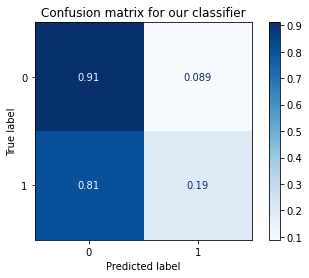

In [74]:
# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()